In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [3]:
# Load train, test, and validation data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(r"D:\data\sumit\train",
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(r"D:\data\sumit\test",
                                             target_size=(64, 64),
                                             batch_size=32,
                                             class_mode='categorical')

val_data = test_datagen.flow_from_directory(r"D:\data\sumit\val",
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')


Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [4]:
train_data.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

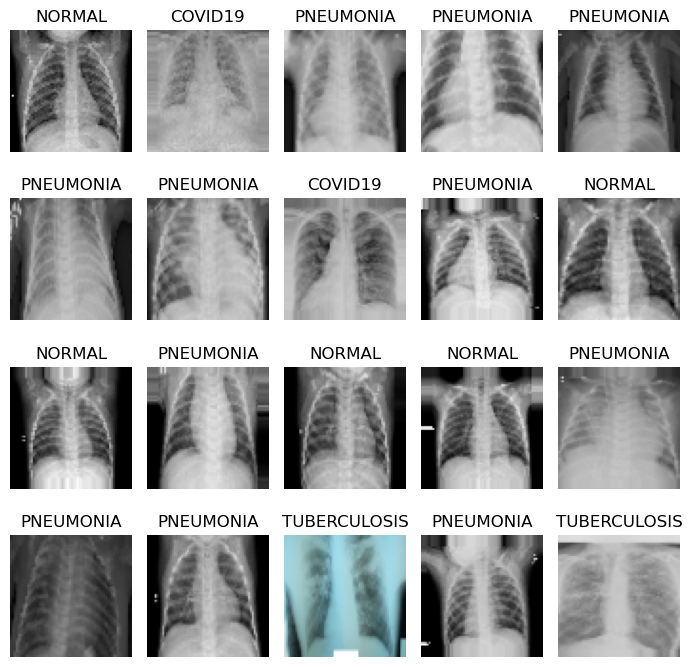

In [5]:
plt.figure(figsize=(7, 7))
for i in range(0, 20):
    plt.subplot(4, 5, i%20+1)
    for X_batch, Y_batch in train_data:
        image = X_batch[0]        
        dic = {0:'COVID19', 1:'NORMAL', 2:'PNEUMONIA', 3:'TUBERCULOSIS'}
        plt.title(dic.get(np.argmax(Y_batch[0])))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray')
        break
plt.tight_layout()
plt.show()


In [6]:
# Model Building
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [7]:
# Model Training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [8]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5", 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    mode='min')

early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3)

In [9]:

history = model.fit(
        train_data,
        steps_per_epoch=train_data.n // train_data.batch_size,
        epochs=10,
        validation_data=val_data,
        validation_steps=val_data.n // val_data.batch_size,
        callbacks=[checkpoint_callback, early_stop_callback])

Epoch 1/10
197/197 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.7752
Epoch 1: val_loss improved from inf to 0.44173, saving model to best_model.h5
197/197 [==============================] - 104s 522ms/step - loss: 0.5977 - accuracy: 0.7752 - val_loss: 0.4417 - val_accuracy: 0.8438
Epoch 2/10
197/197 [==============================] - ETA: 0s - loss: 0.3451 - accuracy: 0.8700
Epoch 2: val_loss improved from 0.44173 to 0.43277, saving model to best_model.h5
197/197 [==============================] - 97s 492ms/step - loss: 0.3451 - accuracy: 0.8700 - val_loss: 0.4328 - val_accuracy: 0.7812
Epoch 3/10
197/197 [==============================] - ETA: 0s - loss: 0.2789 - accuracy: 0.8935
Epoch 3: val_loss did not improve from 0.43277
197/197 [==============================] - 106s 539ms/step - loss: 0.2789 - accuracy: 0.8935 - val_loss: 0.5367 - val_accuracy: 0.7500
Epoch 4/10
197/197 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9155
Epoch

In [10]:
# Load best model from file
best_model = tf.keras.models.load_model('best_model.h5')

In [11]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print('Test accuracy:', test_acc)

25/25 - 13s - loss: 0.4943 - accuracy: 0.8457 - 13s/epoch - 528ms/step
Test accuracy: 0.8456549644470215


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

25/25 [==============================] - 12s 471ms/step - loss: 0.4943 - accuracy: 0.8457


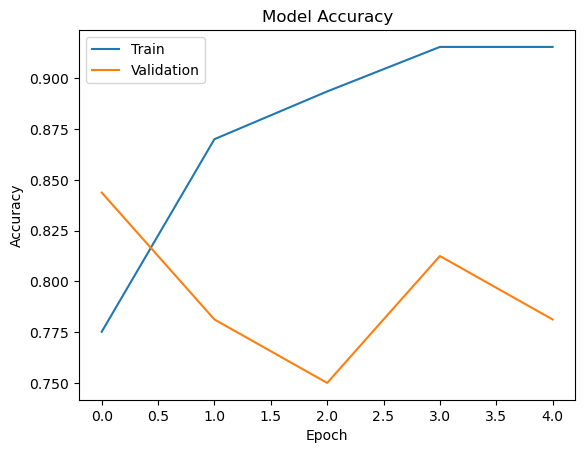

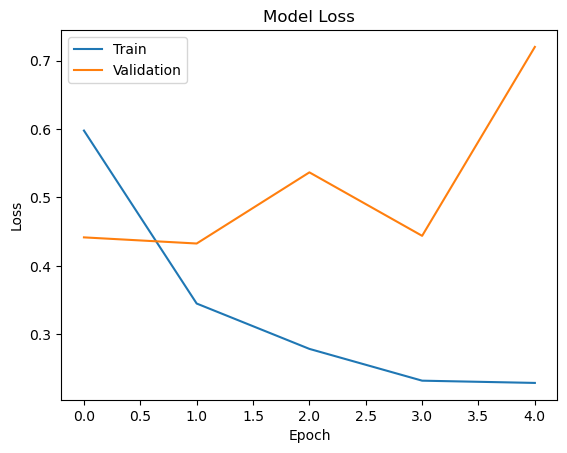

Test accuracy: 0.8456549644470215
Test loss: 0.4943160116672516


In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)

# Plot the training and validation accuracy and loss over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the test accuracy and loss
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


In [14]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

# Define the prediction function
def predict(image):
    # Resize the image to (64,64)
    image = cv2.resize(image, (64,64))
    # Convert image to array
    image = np.array(image)
    # Reshape the image array to (1,64,64,3)
    image = image.reshape((1,64,64,3))
    # Normalize the image
    image = image/255.0
    # Make prediction
    pred = model.predict(image)
    # Get the predicted class label
    label = np.argmax(pred)
    # Return the predicted class label
    if label==0:
        return "COVID19"
    elif label==1:
        return "NORMAL"
    elif label==2:
        return "PNEUMONIA"
    else:
        return "TURBERCULOSIS"

# Define the input and output components of the web app
image = gr.inputs.Image(shape=(64,64))
label = gr.outputs.Label()

# Create the web app
web_app = gr.Interface(fn=predict, inputs=image, outputs=label)

# Launch the web app
web_app.launch()


C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\routes.py", line 399, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\blocks.py", line 1299, in process_api
    result = await self.call_function(
  File "C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\blocks.py", line 1022, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\ProgramData\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\ProgramData\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\ProgramData\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "C:\Us

1/1 [==============================] - 0s 23ms/step
